In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
file_0=pd.read_csv('kiva_loans_part_0.csv')
file_1=pd.read_csv('kiva_loans_part_1.csv')
file_2=pd.read_csv('kiva_loans_part_2.csv')

In [143]:
df_loans=pd.concat([file_0,file_1,file_2], ignore_index=True)

In [144]:
df_loans.shape

(671205, 20)

In [145]:
df_loans.index

RangeIndex(start=0, stop=671205, step=1)

In [146]:
df_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [147]:
list(df_loans.columns)

['id',
 'funded_amount',
 'loan_amount',
 'activity',
 'sector',
 'use',
 'country_code',
 'country',
 'region',
 'currency',
 'partner_id',
 'posted_time',
 'disbursed_time',
 'funded_time',
 'term_in_months',
 'lender_count',
 'tags',
 'borrower_genders',
 'repayment_interval',
 'date']

In [148]:
df_loans.drop(['id','partner_id', 'tags'], axis='columns', inplace=True)

In [149]:
list(df_loans.columns)

['funded_amount',
 'loan_amount',
 'activity',
 'sector',
 'use',
 'country_code',
 'country',
 'region',
 'currency',
 'posted_time',
 'disbursed_time',
 'funded_time',
 'term_in_months',
 'lender_count',
 'borrower_genders',
 'repayment_interval',
 'date']

In [150]:
print(df_loans.isna().sum())

funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country_code              8
country                   0
region                56800
currency                  0
posted_time               0
disbursed_time         2396
funded_time           48331
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
date                      0
dtype: int64


In [151]:
df_loans.dropna(subset=['use', 'borrower_genders', 'country'], inplace=True)


In [152]:
print(df_loans.isna().sum())

funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                       0
country_code              8
country                   0
region                52573
currency                  0
posted_time               0
disbursed_time         1976
funded_time           47643
term_in_months            0
lender_count              0
borrower_genders          0
repayment_interval        0
date                      0
dtype: int64


In [153]:
len(df_loans)

666973

Calculate the percentage of missing data for each column



In [154]:
missing_percentage = df_loans.isna().mean() * 100

print(missing_percentage)

funded_amount         0.000000
loan_amount           0.000000
activity              0.000000
sector                0.000000
use                   0.000000
country_code          0.001199
country               0.000000
region                7.882328
currency              0.000000
posted_time           0.000000
disbursed_time        0.296264
funded_time           7.143168
term_in_months        0.000000
lender_count          0.000000
borrower_genders      0.000000
repayment_interval    0.000000
date                  0.000000
dtype: float64


In [155]:
df_loans.shape

(666973, 17)

In [156]:
# Filter out rows where 'funded_time' is not NaN

df_funded_time = df_loans[~df_loans['funded_time'].isna()]


In [157]:
df_funded_time.head(10)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,female,irregular,2014-01-01
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular,2014-01-01
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,female,bullet,2014-01-01
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,female,irregular,2014-01-01
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,female,monthly,2014-01-01
5,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,female,irregular,2014-01-01
6,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,female,bullet,2014-01-01
7,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,female,monthly,2014-01-01
8,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,female,monthly,2014-01-01
9,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,female,irregular,2014-01-01


In [159]:
print(df_loans['funded_time'].dtype)

object


In [160]:
df_loans['funded_time'].head()

0    2014-01-02 10:06:32+00:00
1    2014-01-02 09:17:23+00:00
2    2014-01-01 16:01:36+00:00
3    2014-01-01 13:00:00+00:00
4    2014-01-01 19:18:51+00:00
Name: funded_time, dtype: object

I can see that 'funded_time', 'posted_time' and 'disbursed_time' are an object so I have to convert them to datetime

In [164]:
# Convert columns to datetime
df_loans['funded_time'] = pd.to_datetime(df_loans['funded_time'], errors='coerce')
df_loans['posted_time'] = pd.to_datetime(df_loans['posted_time'], errors='coerce')
df_loans['disbursed_time'] = pd.to_datetime(df_loans['disbursed_time'], errors='coerce')


In [166]:
#Check the data.type
print(df_loans.dtypes)


funded_amount                     float64
loan_amount                       float64
activity                           object
sector                             object
use                                object
country_code                       object
country                            object
region                             object
currency                           object
posted_time           datetime64[ns, UTC]
disbursed_time        datetime64[ns, UTC]
funded_time           datetime64[ns, UTC]
term_in_months                    float64
lender_count                        int64
borrower_genders                   object
repayment_interval                 object
date                               object
dtype: object


In [171]:
df_loans['disbursed_time']

0        2013-12-17 08:00:00+00:00
1        2013-12-17 08:00:00+00:00
2        2013-12-17 08:00:00+00:00
3        2013-12-24 08:00:00+00:00
4        2013-12-17 08:00:00+00:00
                    ...           
671199   2017-07-24 07:00:00+00:00
671200   2017-07-25 07:00:00+00:00
671201   2017-07-24 07:00:00+00:00
671203   2017-07-25 07:00:00+00:00
671204   2017-07-25 07:00:00+00:00
Name: disbursed_time, Length: 666973, dtype: datetime64[ns, UTC]

In [167]:
# Remove rows with missing values in 'disbursed_time' and 'funded_time'
df_cleaned = df_loans.dropna(subset=['funded_time', 'disbursed_time'])


In [169]:
missing_percentage = df_cleaned.isna().mean() * 100

print(missing_percentage)

funded_amount         0.000000
loan_amount           0.000000
activity              0.000000
sector                0.000000
use                   0.000000
country_code          0.001292
country               0.000000
region                7.296346
currency              0.000000
posted_time           0.000000
disbursed_time        0.000000
funded_time           0.000000
term_in_months        0.000000
lender_count          0.000000
borrower_genders      0.000000
repayment_interval    0.000000
date                  0.000000
dtype: float64


In [170]:
df_cleaned.shape

(619310, 17)

Now I can see that date.type virables are cleand so I can anlize them

**Number of Loans Over Time**

1. How does the number of loans given out change over time? Are there any noticeable patterns or changes during different periods, like months or years?

In [172]:
# We create separate columns or values from a datetime field that represent the year and month components of the date
# We extract year and month
df_cleaned['year'] = df_cleaned['disbursed_time'].dt.year
df_cleaned['month'] = df_cleaned['disbursed_time'].dt.month

/var/folders/60/6wzpsym51m734jtcp7v8wqn40000gn/T/ipykernel_15832/3091288631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned['disbursed_time'].dt.year
/var/folders/60/6wzpsym51m734jtcp7v8wqn40000gn/T/ipykernel_15832/3091288631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = df_cleaned['disbursed_time'].dt.month


In [176]:
df_cleaned.loc[:, 'year'] = df_cleaned['disbursed_time'].dt.year
df_cleaned.loc[:, 'month'] = df_cleaned['disbursed_time'].dt.month
df_cleaned.loc[:, 'day'] = df_cleaned['disbursed_time'].dt.day


/var/folders/60/6wzpsym51m734jtcp7v8wqn40000gn/T/ipykernel_15832/2247605667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'day'] = df_cleaned['disbursed_time'].dt.day


In [177]:
df_cleaned.head(2)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,year,month,day
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,female,irregular,2014-01-01,2013,12,17
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular,2014-01-01,2013,12,17


In [178]:
# Create a 'year_month' column for easy grouping
df_cleaned['year_month'] = df_cleaned['disbursed_time'].dt.to_period('M')


/var/folders/60/6wzpsym51m734jtcp7v8wqn40000gn/T/ipykernel_15832/1811607187.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cleaned['year_month'] = df_cleaned['disbursed_time'].dt.to_period('M')
/var/folders/60/6wzpsym51m734jtcp7v8wqn40000gn/T/ipykernel_15832/1811607187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year_month'] = df_cleaned['disbursed_time'].dt.to_period('M')


In [179]:
df_cleaned.head(2)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,posted_time,...,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,year,month,day,year_month
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,2014-01-01 06:12:39+00:00,...,2014-01-02 10:06:32+00:00,12.0,12,female,irregular,2014-01-01,2013,12,17,2013-12
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,2014-01-01 06:51:08+00:00,...,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular,2014-01-01,2013,12,17,2013-12


In [202]:
# Count the number of loans in each month
loans_per_month = df_cleaned.groupby('month').size()


In [203]:
print(loans_per_month)

month
1     53067
2     68045
3     65505
4     58991
5     60499
6     49590
7     43009
8     42852
9     43551
10    44384
11    42854
12    46963
dtype: int64


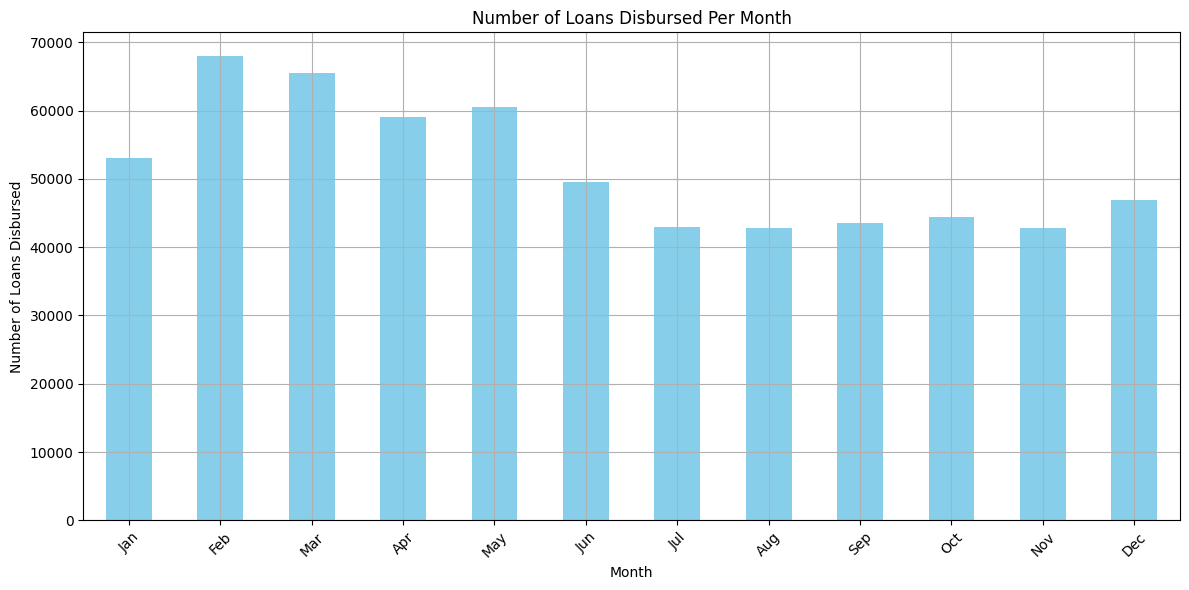

In [205]:
#Vizualization loans_per_month
plt.figure(figsize=(12, 6))
loans_per_month.plot(kind='bar', color='skyblue')  # Use 'skyblue' for better visibility
plt.title('Number of Loans Disbursed Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Loans Disbursed')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)  # Label months
plt.grid(True)
plt.tight_layout()
plt.show()


In [208]:
# Count the number of loans in each year
loans_per_year = df_cleaned.groupby('year').size()

In [209]:
print(loans_per_year)

year
2013      5349
2014    159561
2015    170383
2016    183006
2017    101011
dtype: int64


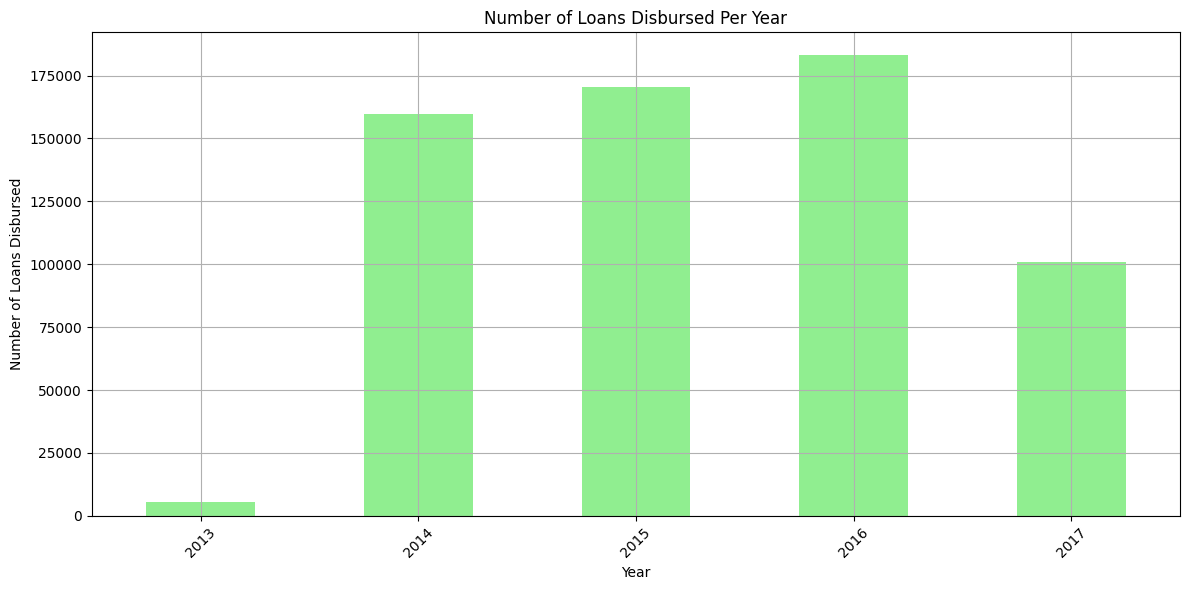

In [210]:
# Visualization: number of loans per year
plt.figure(figsize=(12, 6))
loans_per_year.plot(kind='bar', color='lightgreen')  # Use 'lightgreen' for visibility
plt.title('Number of Loans Disbursed Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Loans Disbursed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


**Disbursed Amount Over Time**


This analysis looks at the total and average amount of money that was actually disbursed in the loans over time.

In [216]:
# Calculate the total sum of 'loan_amount'
total_loan_amount = df_cleaned['loan_amount'].sum()

print("The total sum of all loan amounts is:", total_loan_amount)

The total sum of all loan amounts is: 493450050.0


In [213]:
# Calculate the overall average loan amount
average_loan_amount = df_cleaned['loan_amount'].mean()

print("The average loan amount is:", average_loan_amount)

The average loan amount is: 796.7739096736691


In [214]:
# Calculate the overall median of 'loan_amount'
median_loan_amount = df_cleaned['loan_amount'].median()

print("The overall median loan amount is:", median_loan_amount)

The overall median loan amount is: 450.0


In [215]:
# Calculate the overall variance of 'loan_amount'
variance_loan_amount = df_cleaned['loan_amount'].var()

print("The overall variance of loan amounts is:", variance_loan_amount)

The overall variance of loan amounts is: 1316414.4686785308


Now I will focus on months and years

In [217]:
#Total loan amount per month

total_loan_per_month = df_cleaned.groupby('month')['loan_amount'].sum()

In [218]:
print(total_loan_per_month)

month
1     42751575.0
2     53746675.0
3     52309700.0
4     47245850.0
5     46280475.0
6     39354700.0
7     34446200.0
8     33454225.0
9     34431525.0
10    34595700.0
11    35174425.0
12    39659000.0
Name: loan_amount, dtype: float64


In [224]:
# Group by 'month' and calculate the average of 'loan_amount' for each month
average_loan_amount_per_month = df_cleaned.groupby('month')['loan_amount'].mean()


In [225]:
print(average_loan_amount_per_month)

month
1     805.615072
2     789.869572
3     798.560415
4     800.899290
5     764.979173
6     793.601533
7     800.906787
8     780.692266
9     790.602397
10    779.463320
11    820.796775
12    844.473309
Name: loan_amount, dtype: float64


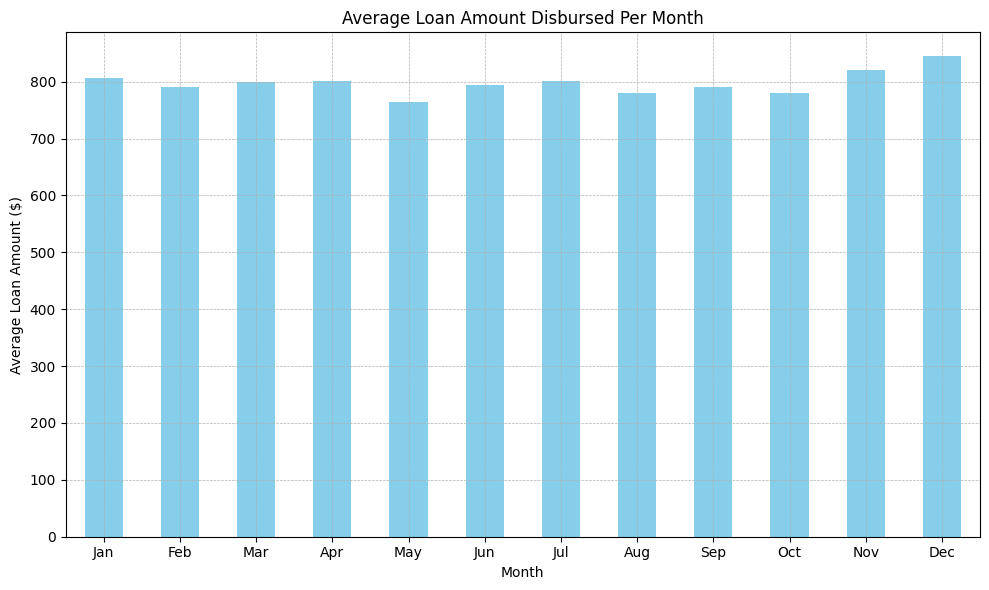

In [234]:

months = range(0, 12)  
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
average_loan_amount_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Loan Amount Disbursed Per Month')
plt.xlabel('Month')
plt.ylabel('Average Loan Amount ($)')
plt.xticks(ticks=months, labels=month_labels, rotation=0)  # Correctly set ticks and labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [230]:
# Now we calculate avreage loan amount per year
average_loan_amount_per_year=df_cleaned.groupby('year')['loan_amount'].mean()

In [231]:
print(average_loan_amount_per_year)

year
2013    915.016826
2014    844.390547
2015    812.581801
2016    778.553435
2017    721.641702
Name: loan_amount, dtype: float64


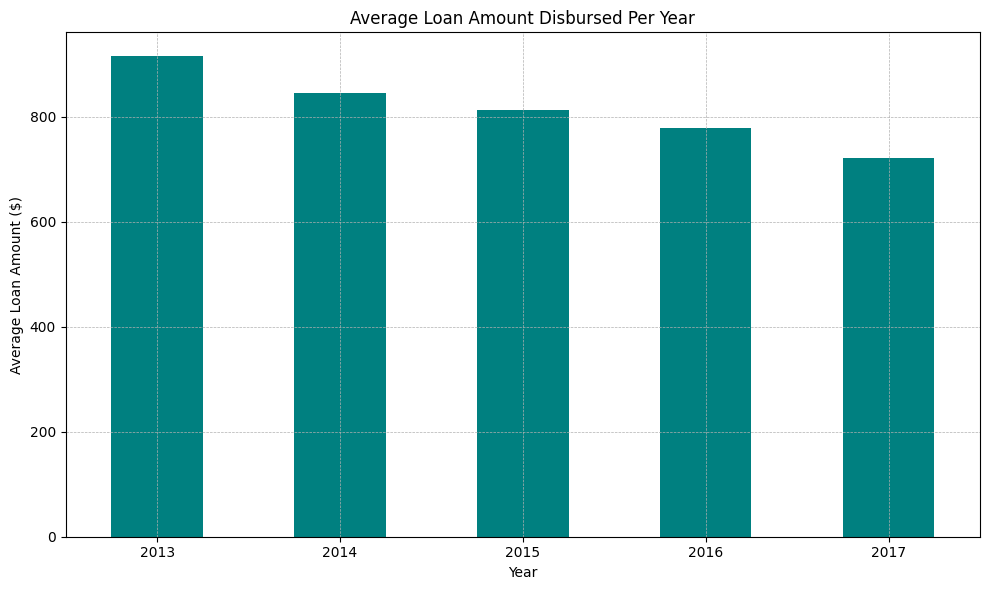

In [233]:
# Plotting the average loan amount per year
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
average_loan_amount_per_year.plot(kind='bar', color='teal')  # Use a bar chart and color it teal for aesthetics
plt.title('Average Loan Amount Disbursed Per Year')  # Add a title
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Average Loan Amount ($)')  # Label the y-axis
plt.xticks(rotation=0)  # Rotate x-axis labels to show years clearly
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add gridlines for readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()

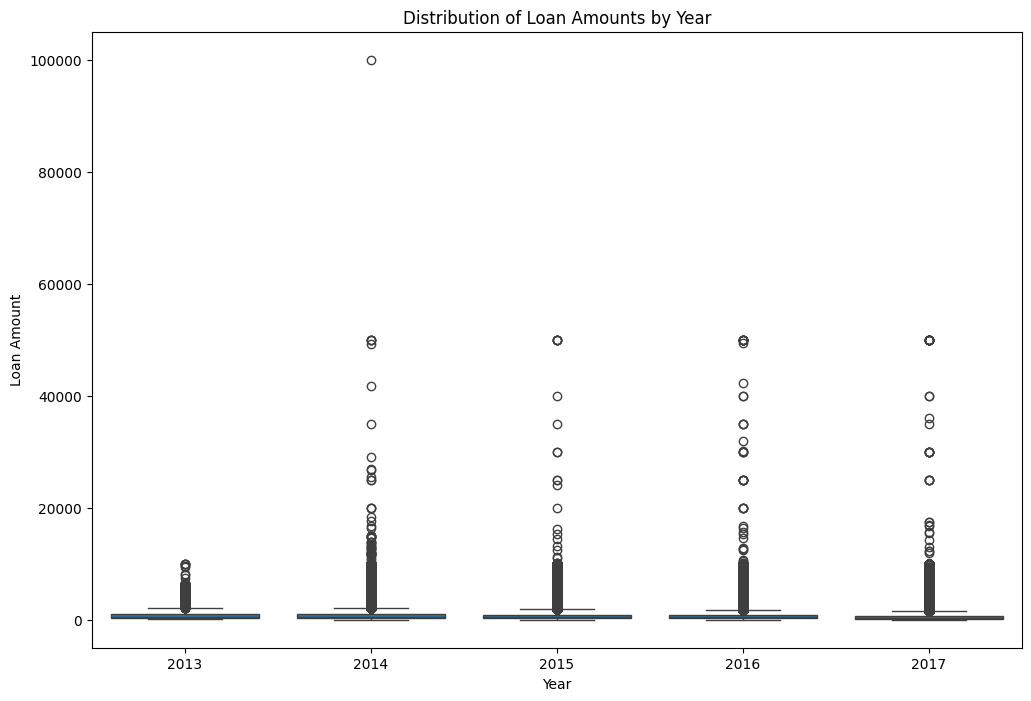

In [236]:
#Distribution of Loan Amounts by year
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='loan_amount', data=df_cleaned)
plt.title('Distribution of Loan Amounts by Year')
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.show()